# CycleGAN

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 30.23 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh summer2winter_yosemite

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh iphone2dslr_flower

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh summer2winter_yosemite

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [ ]:
# original command
#!python test.py --dataroot datasets/summer2winter_yosemite/testA --name summer2winter_yosemite_pretrained --model test --no_dropout --use_wandb False

In [ ]:
# on another dataset
!python test.py --dataroot datasets/iphone2dslr_flower/testA --name summer2winter_yosemite_pretrained --model test --no_dropout --use_wandb False

## Task 1: Run your selected models on some of your own data

In [12]:
!mkdir your_own_folder

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/en/e/ea/TwinPeaks_openingshotcredits.jpg -P your_own_folder/

In [ ]:
# Task:
#   Can you input your own data?
!python test.py --dataroot your_own_folder --name summer2winter_yosemite_pretrained --model test --no_dropout --use_wandb  False

In [19]:
!ls results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits*

results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_fake.png
results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_real.png


## Task 2: Can you run it on a full video?

In [ ]:
# Use FFMPEG from the last code example to extract frames
# Then run the CycleGAN on the whole folder

# Visualize

## Normal functioning:

In [ ]:
!ls ./results/summer2winter_yosemite_pretrained/test_latest/images/

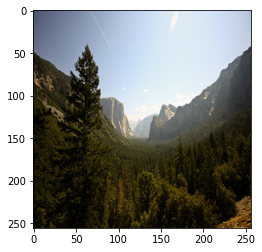

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/2010-09-07 12:23:20_real.png')
plt.imshow(img)
# source image:

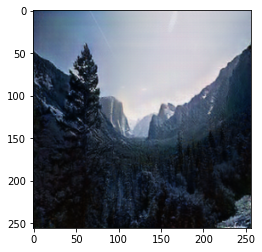

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/2010-09-07 12:23:20_fake.png')
plt.imshow(img)
# made into winter:

## On another dataset

In [ ]:
!ls ./results/summer2winter_yosemite_pretrained/test_latest/images/

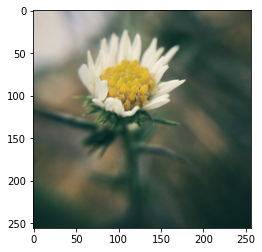

In [11]:
import matplotlib.pyplot as plt

image_name = "c1.staticflickr.com-1-274-32601014780_57dbcb365f"

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_real.png')
plt.imshow(img)
# original image:

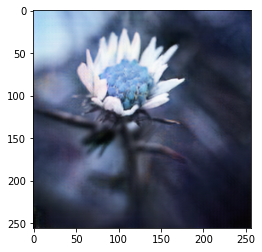

In [10]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_fake.png')
plt.imshow(img) 
# <<< flower turned into winter mode!

## On another image

In [20]:
!ls ./results/summer2winter_yosemite_pretrained/test_latest/images/Twin*

./results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_fake.png
./results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_real.png


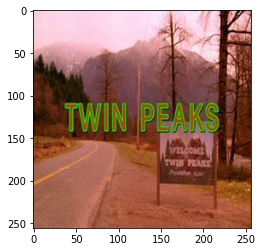

In [21]:
import matplotlib.pyplot as plt

image_name = "TwinPeaks_openingshotcredits"

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_real.png')
plt.imshow(img)
# original image:

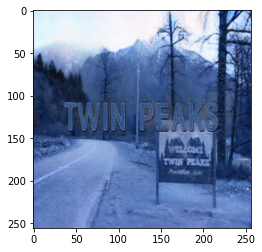

In [22]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_fake.png')
plt.imshow(img) 
# <<< flower turned into winter mode!

# Training (sadly too slow to do in the class)

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!nvidia-smi
# maybe we can have bigger batch size? (batch_size: 1 == 26 min / epoch right now!)
# set save interval to 1

In [ ]:
!python train.py --dataroot ./datasets/summer2winter_yosemite --name summer2winter_yosemite --model cycle_gan --use_wandb

In [ ]:
!ls checkpoints/summer2winter_yosemite

latest_net_D_A.pth  latest_net_G_A.pth	loss_log.txt   web
latest_net_D_B.pth  latest_net_G_B.pth	train_opt.txt


In [ ]:
!zip -r summer2winter_yosemite_5epochs.zip checkpoints/summer2winter_yosemite